In [45]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Lecture 12 (updated) ##

## Chebyshev's Bounds ##

In [3]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [ ]:
births.labels

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

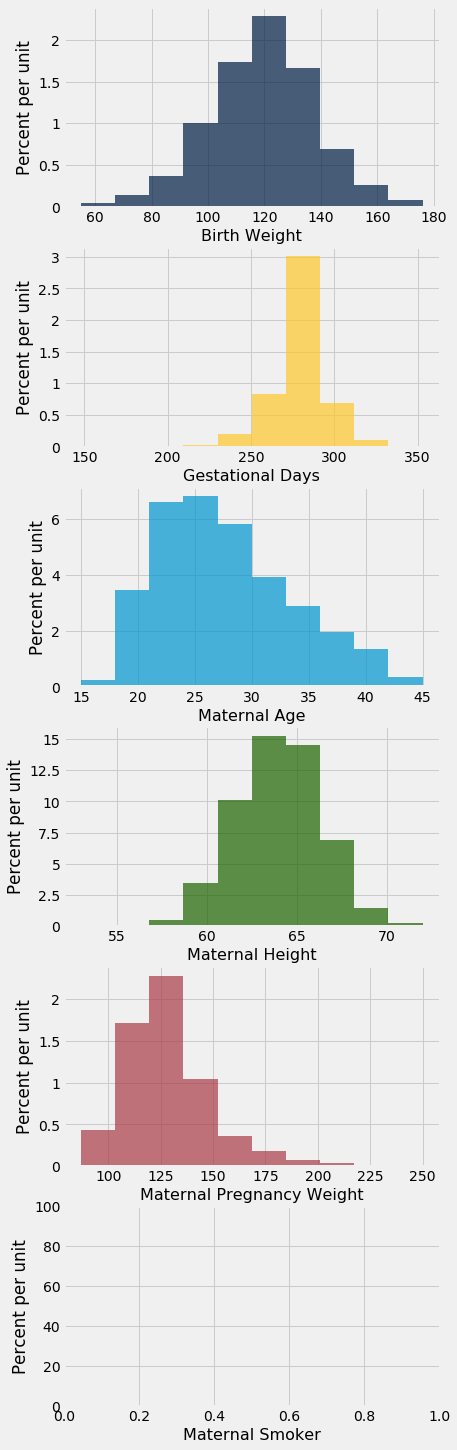

In [4]:
births.hist(overlay = False)

In [5]:
mh = births.column('Maternal Height')
mean = np.mean(mh)
sd = np.std(mh)
mean, sd

(64.04940374787053, 2.5250254409674375)

In [6]:
within_3_SDs = births.where('Maternal Height', are.between(mean - 3*sd, mean + 3*sd))

In [7]:
within_3_SDs.num_rows/births.num_rows

0.9965928449744463

In [9]:
# What's Chebyshev's Bound for 3 SDs?
1-1/3**2

0.8888888888888888

In [11]:
# See if Chebyshev's bounds work for different distributions
# Go through all of the different columns
# Print what percentage are within 1-5 SDs
#   Average plus or minus 1 SDs: x %
#   Average plus or minus 2 SDs: y %, etc.
for col in births.labels:
    vals = births.column(col)
    mean = np.mean(vals)
    sd = np.std(vals)
    print(col)
    for i in np.arange(1,6):
        chosen = births.where(col, are.between(mean- i * sd, mean+i*sd))
        prop = chosen.num_rows/births.num_rows
        percent = round(prop *100, 2)
        print("Average plus or minus", i, "SDs:", percent, "%")
    print()


Birth Weight
Average plus or minus 1 SDs: 69.25 %
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 1 SDs: 79.47 %
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 1 SDs: 67.46 %
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 1 SDs: 67.38 %
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 1 SDs: 73.85 %
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 5

## Standard Units ##

In [13]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [12]:
ages = births.column('Maternal Age')

In [15]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [16]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

In [17]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [ ]:
np.mean(ages), np.std(ages)
!git add lec12.ipynb

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


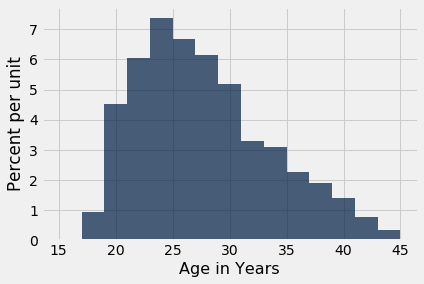

In [19]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


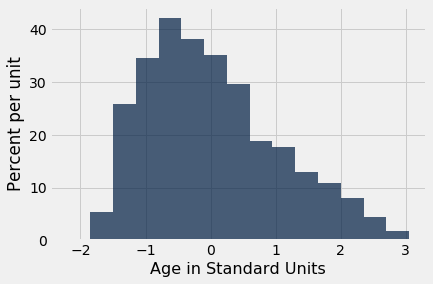

In [20]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
#plots.xlim(-2, 3.1);

## The SD and Bell-Shaped Curves ##

In [ ]:
heights

In [ ]:
heights.scatter('MidParent')

In [22]:
hybrid = Table.read_table('hybrid.csv')

In [23]:
hybrid

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact
Insight,2001,19036.7,9.52,53,Two Seater
Insight,2002,19137,9.71,53,Two Seater
Alphard,2003,38084.8,8.33,40.46,Minivan
Insight,2003,19137,9.52,53,Two Seater
Civic,2003,14071.9,8.62,41,Compact


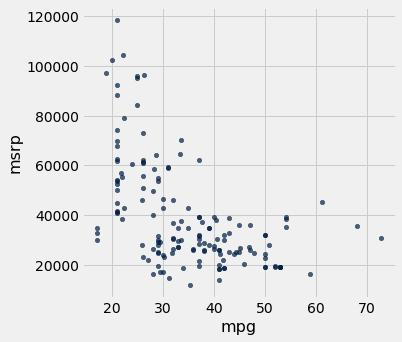

In [24]:
hybrid.scatter('mpg', 'msrp')

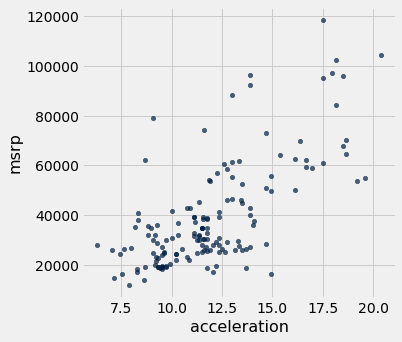

In [25]:
hybrid.scatter('acceleration', 'msrp')

In [26]:
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

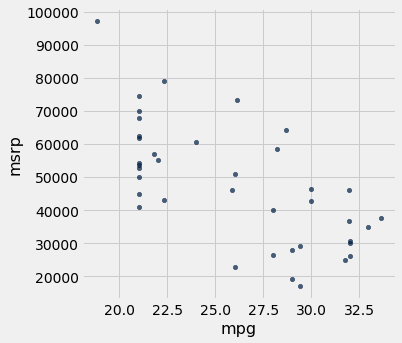

In [27]:
suv.scatter('mpg', 'msrp')

In [ ]:
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3)

### Calculating $r$ ###

In [28]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


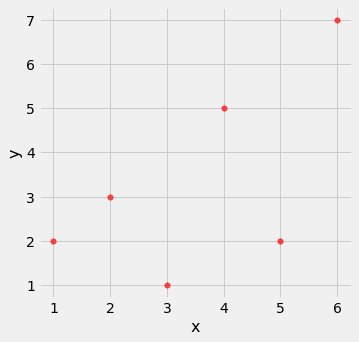

In [29]:
t.scatter('x', 'y', s=30, color='red')

In [30]:
t= t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x,y,x (standard units),y (standard units)
1,2,-1.46385,-0.648886
2,3,-0.87831,-0.162221
3,1,-0.29277,-1.13555
4,5,0.29277,0.811107
5,2,0.87831,-0.648886
6,7,1.46385,1.78444


In [ ]:
su_product = t.column(2) * t.column(3)
t = t.with_column('product of standard units', su_product)
t

In [ ]:
# r is the average of the products of standard units

r = np.mean(t.column(4))
r

In [32]:
def correlation(tbl, x, y):
    """return the correlation coefficient of x and y
    tbl is a table; 
    x and y are column labels"""
    return np.mean(standard_units(tbl.column(x))* standard_units(tbl.column(y)))

In [34]:
correlation(t, 'x', 'x')

1.0

In [36]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

In [37]:
correlation(t, 'x', 'y')

0.6174163971897709

In [38]:
correlation(t, 'y', 'x')

0.6174163971897709

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t.scatter('y', 'x', s=30, color='red')

In [ ]:
correlation(t, 'y', 'x')

## $r$ Interpretation ##

### Nonlinearity ###

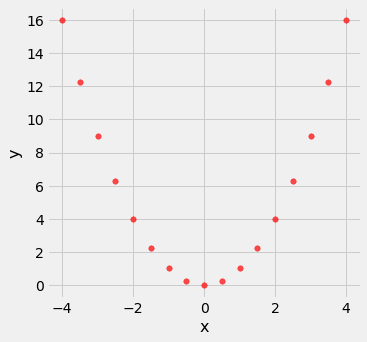

In [39]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [40]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers ###

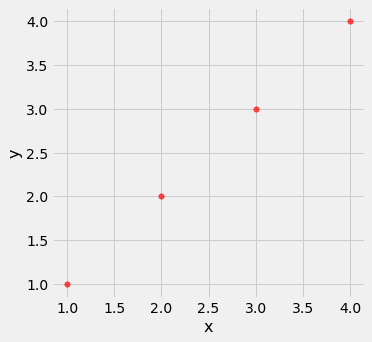

In [41]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [42]:
correlation(line, 'x', 'y')

1.0

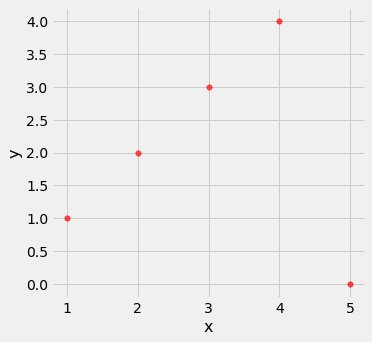

In [43]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [44]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlation ###

In [ ]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')